# IODA-exclusion notebook

**Purpose**: This notebook generates exclusion table formatted for XCalibur and MaxQuant.Live. It accepts as input one mzTab file from one sample data for the ions to exclude. If you need to generate a mzTab, we recommend using the following TOPPAS/OpenMS. Please refer to the documentation page for more informations or the TOPPAS/OpenMS for IODA-exclusion worklow.

**Instructions**: 
- Follow the instructions indicated below and run the cells accordingly
- Provide the mzTab for the sample data to be used. 
- Modify the variables below as needed.

In [1]:
from IODA_exclusion_workflow import *

[I 200626 00:07:34 IODA_exclusion_workflow:19] 2020-06-26 00:07:34.622551


============================

### Step 1 - Provide the input mzTab file

#### Method 1 
Upload your mzTab with the Jupyter notebook/lab interface. [See documentation here](. 
#### Method 2
We support downloading the mzTab file from Google Drive, 
- **Google Drive**: obtain the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').
- Other downloadable links could work, but the following were tested and are not supported: OneDrive/SharePoint, We Transfer, Gofile.io.

**Specificy the file name or sharing link in the *input_filename* variable in the cell below**. (The string must be between parenthesis).

In [2]:
input_filename = 'filenameORsharinglink'

============================
### Step 2 - Specify the variables for the workflow
**Specify the variables for exclusion list in the cell below**

*min_intensity*: the minimum intensity for the ion/feature to be retained in the inclusion list.

*rt_exclusion_margin*: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range.

In [3]:
min_intensity = 350000
rt_exclusion_margin = 5

In [4]:
#Debug variables
input_filename = 'https://drive.google.com/file/d/1LYk-PKsBWl4Pv7c1TlhQwaqwkF2T6sux/view?usp=sharing'
#input_filename = 'tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab'

============================
### Step 3 - Run the cell below

Beside running the cell below, no action is needed.

[I 200626 00:07:36 IODA_exclusion_workflow:220] Starting the IODA-exclusion workflow
[I 200626 00:07:36 IODA_exclusion_workflow:227] This is the Google Drive download link:https://drive.google.com/file/d/1LYk-PKsBWl4Pv7c1TlhQwaqwkF2T6sux/view?usp=sharing


Getting the mzTab
Converting mzTab to table format


[I 200626 00:07:42 IODA_exclusion_workflow:45] Filename(s) in the mzTab['Euphorbia_rogers_latex_Blank_MS1_2uL']
[I 200626 00:07:43 IODA_exclusion_workflow:246] Assumed blank sample name: Euphorbia_rogers_latex_Blank_MS1_2uL
[I 200626 00:07:43 IODA_exclusion_workflow:249] User-defined parameters
[I 200626 00:07:43 IODA_exclusion_workflow:250] Minimum ion intensity treshold (count) = 350000
[I 200626 00:07:43 IODA_exclusion_workflow:251] Additional margin for retention time range exclusion (seconds) = 5
[I 200626 00:07:43 IODA_exclusion_workflow:94] Initial number of ions = 436
[I 200626 00:07:43 IODA_exclusion_workflow:96] Number of ions after intensity filtering = 354, with intensity >350000


Preparing the table
Preparing list of excluded ions in XCalibur format
Preparing list of excluded ions in MaxQuant.Live format
Preparing plotting of the ions excluded
Zipping workflow results files
All files zipped successfully!
End the IODA-exclusion workflow
Plotting the results
 


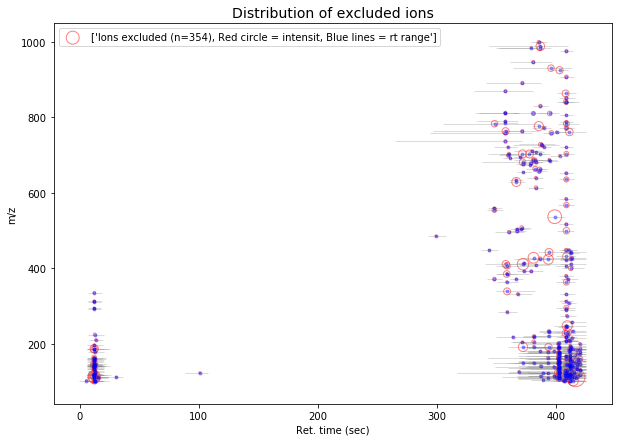

In [5]:
make_exclusion_from_mzTab(input_filename, min_intensity, rt_exclusion_margin)

### Step 4 - Examine the results

- Examine the IODA-exclusion worflow log and the plots above in order to decide if the 'min_intensity' parameter is adapted to your data/mass spectrometer and sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

![](results/plot_exclusion_scatter_RT.png)
![](results/plot_exclusion_scatter_MZ.png)

### Step 5 - Download the results

Download the result files from
[download_results/results_IODA_exclusion.zip](download_results/results_IODA_exclusion.zip)

### Step 6 - Prepare your acquisition method
For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).

In [15]:
from IPython.display import display, FileLink

local_file = FileLink('download_results/results_IODA_exclusion.zip', result_html_prefix="Click here to download: ")
display(local_file)

/Users/lfnot/Google Drive/#Jupyter_training/2006_IODA_Binder/download_results/results_IODA_exclusion.zip